# MODEL B V1.1

In [1]:
print("bismillahirrahmanirrahim")
print("Assalamualaikum")

bismillahirrahmanirrahim
Assalamualaikum


# 1. IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

# 2. LOAD DATASET

## data train

In [3]:
# Load dataset
data_train = pd.read_csv('data_training.csv')

data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Chan    8192 non-null   int64
 1   Counts  8192 non-null   int64
 2   Label   8192 non-null   int64
dtypes: int64(3)
memory usage: 192.1 KB


,Chan,Counts,Label
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [4]:
# Scatter plot for Channel vs Counts

# Filter data by label
data_train_co60 = data_train[data_train['Label'] == 0]
data_train_cs137 = data_train[data_train['Label'] == 1]



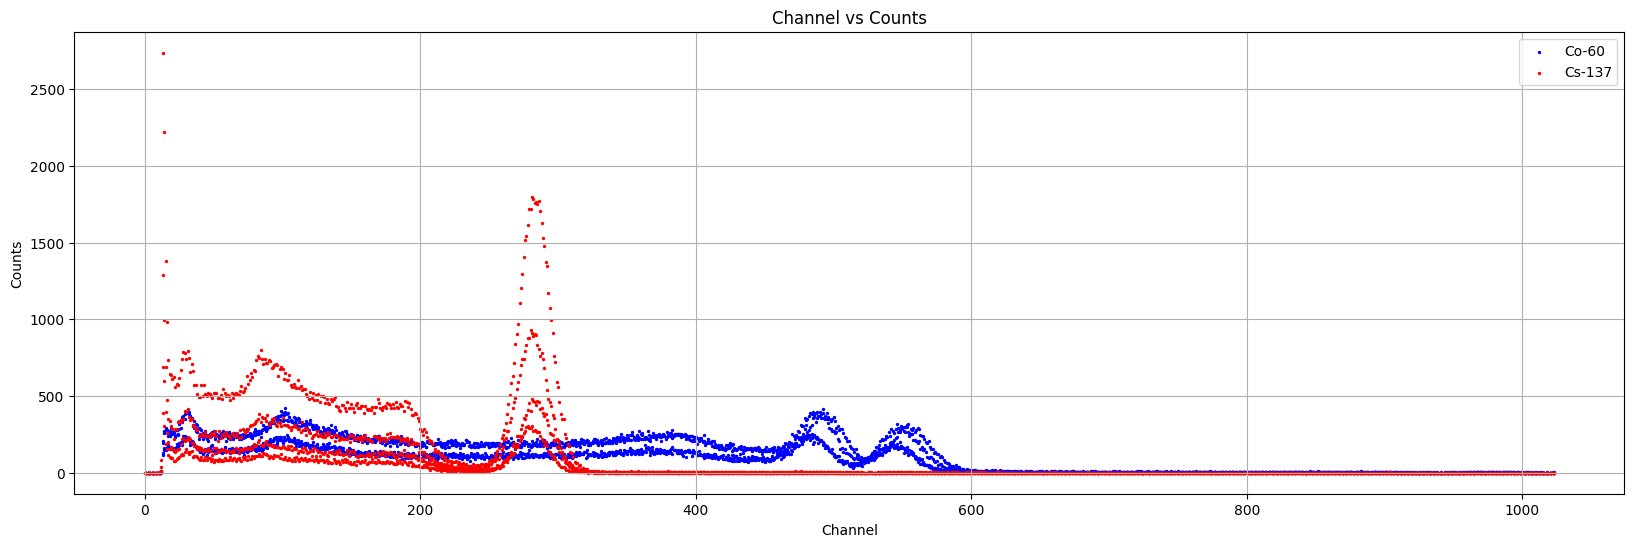

In [5]:
# Scatter plot for Channel vs Counts

plt.figure(figsize=(20, 6))
plt.scatter(data_train_co60['Chan'], data_train_co60['Counts'], label='Co-60', s=2, c='blue')
plt.scatter(data_train_cs137['Chan'], data_train_cs137['Counts'], label='Cs-137', s=2, c='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Channel vs Counts')
plt.grid(True)
plt.legend()

plt.show()

## data testing

In [6]:
data_test = pd.read_csv('data_testing.csv')

data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Chan    8192 non-null   int64
 1   Counts  8192 non-null   int64
 2   Label   8192 non-null   int64
dtypes: int64(3)
memory usage: 192.1 KB


,Chan,Counts,Label
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [7]:
# Scatter plot for Channel vs Counts

# Filter data by label
data_test_co60 = data_test[data_test['Label'] == 0]
data_test_cs137 = data_test[data_test['Label'] == 1]



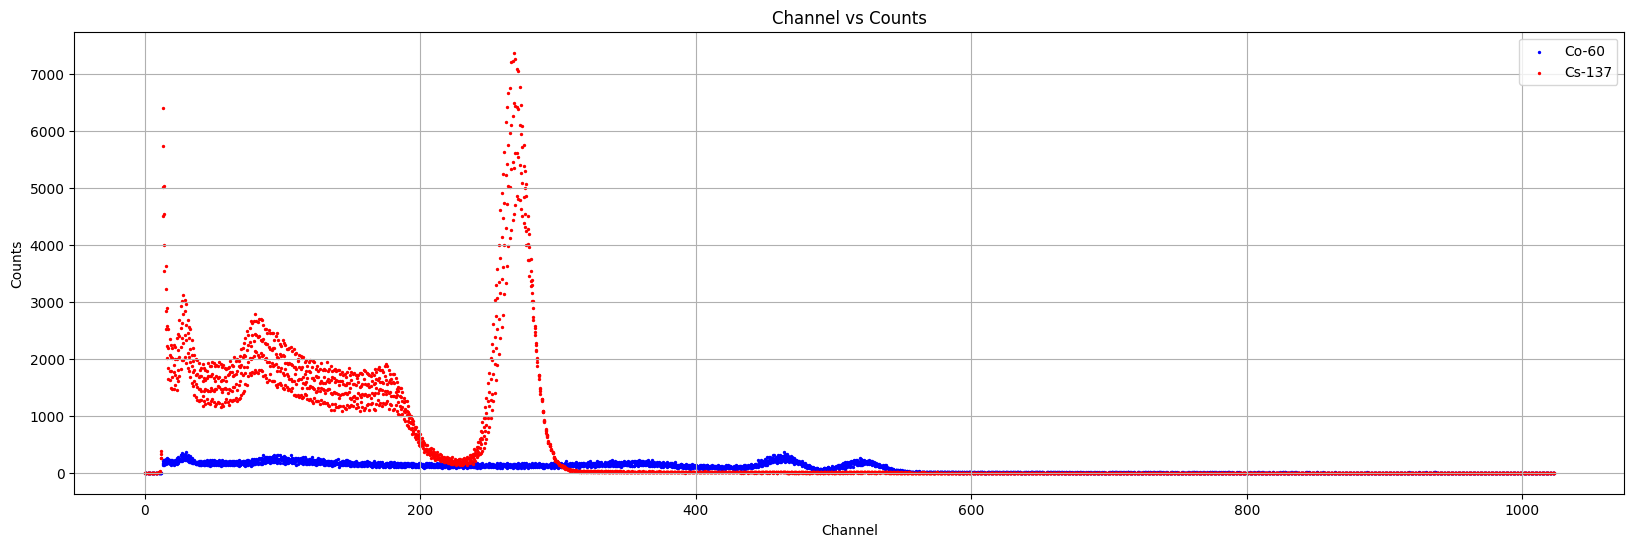

In [8]:
# Scatter plot for Channel vs Counts

plt.figure(figsize=(20, 6))
plt.scatter(data_test_co60['Chan'], data_test_co60['Counts'], label='Co-60', s=2, c='blue')
plt.scatter(data_test_cs137['Chan'], data_test_cs137['Counts'], label='Cs-137', s=2, c='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Channel vs Counts')
plt.grid(True)
plt.legend()

plt.show()

## data validation

In [9]:
data_val = pd.read_csv('data_validation.csv')

data_val.info()
data_val.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Chan    4096 non-null   int64
 1   Counts  4096 non-null   int64
 2   Label   4096 non-null   int64
dtypes: int64(3)
memory usage: 96.1 KB


,Chan,Counts,Label
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [10]:
# Scatter plot for Channel vs Counts

# Filter data by label
data_val_co60 = data_val[data_val['Label'] == 0]
data_val_cs137 = data_val[data_val['Label'] == 1]



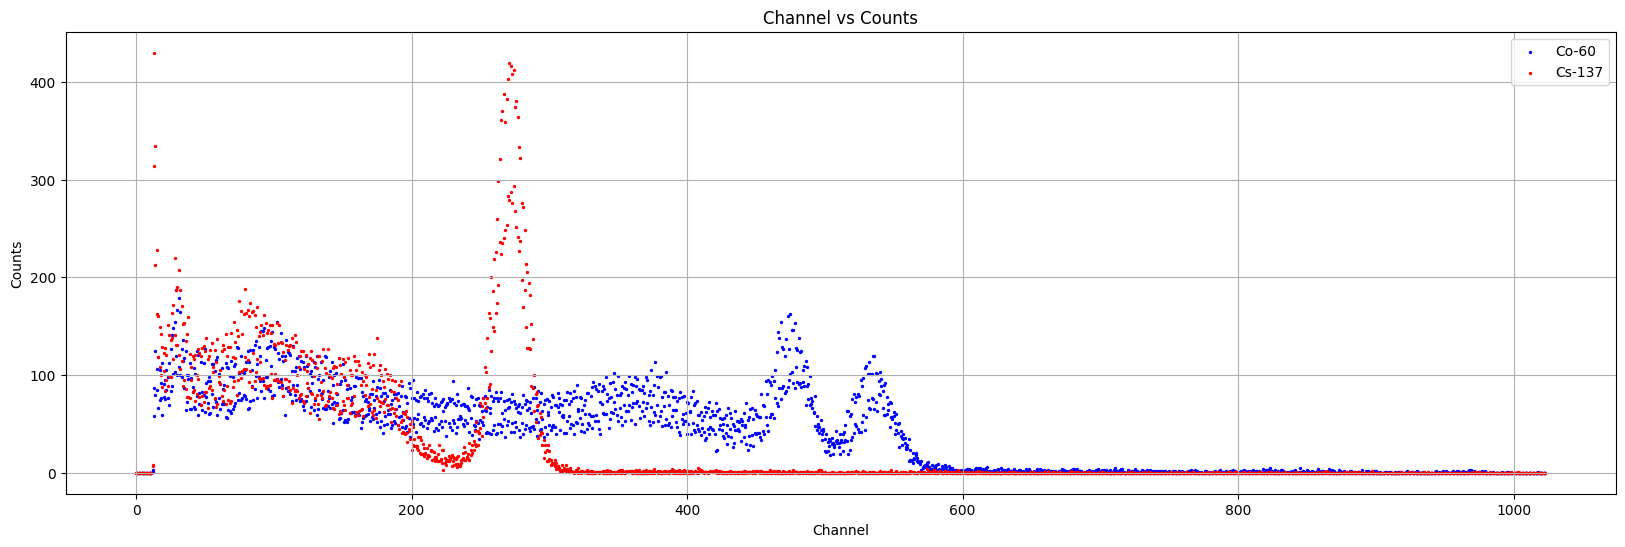

In [11]:
# Scatter plot for Channel vs Counts


plt.figure(figsize=(20, 6))
plt.scatter(data_val_co60['Chan'], data_val_co60['Counts'], label='Co-60', s=2, c='blue')
plt.scatter(data_val_cs137['Chan'], data_val_cs137['Counts'], label='Cs-137', s=2, c='red')
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('Channel vs Counts')
plt.grid(True)
plt.legend()

plt.show()

# 3. PREPARE DATASET

In [12]:
# last column is the target
X_train = data_train.iloc[:, :-1].values
y_train = data_train.iloc[:, -1].values  # Ensure binary labels (0 or 1)

In [13]:
# last column is the target
X_test = data_test.iloc[:, :-1].values
y_test = data_test.iloc[:, -1].values  # Ensure binary labels (0 or 1)

In [14]:
X_val = data_val.iloc[:, :-1].values
y_val = data_val.iloc[:, -1].values

<b> Explanation of the Code </b>

In this cell, the dataset is prepared for machine learning by separating the features and the target labels. Here's a breakdown of the code:

1. **Feature Matrix (`X`)**:
    - `X = df.iloc[:, :-1].values` selects all columns except the last one as the input features. The `.values` attribute converts the DataFrame into a NumPy array.

2. **Target Vector (`y`)**:
    - `y = df.iloc[:, -1].values` selects the last column as the target labels. The `.values` attribute converts the DataFrame into a NumPy array.

3. **Binary Labels**:
    - It is assumed that the target labels (`y`) are binary (0 or 1), which is suitable for binary classification tasks.

This step is crucial for preparing the data for machine learning models, as it separates the input features (`X`) from the target labels (`y`).

In [15]:
# To display the full content of a numpy array
np.set_printoptions(threshold=np.inf)

# Print the full content of X
print(X_train)

[[   0    0]
 [   1    0]
 [   2    0]
 [   3    0]
 [   4    0]
 [   5    0]
 [   6    0]
 [   7    0]
 [   8    0]
 [   9    0]
 [  10    0]
 [  11    0]
 [  12    4]
 [  13  114]
 [  14  146]
 [  15  149]
 [  16  154]
 [  17  179]
 [  18  168]
 [  19  171]
 [  20  161]
 [  21  151]
 [  22  158]
 [  23  175]
 [  24  181]
 [  25  180]
 [  26  201]
 [  27  201]
 [  28  240]
 [  29  223]
 [  30  233]
 [  31  227]
 [  32  224]
 [  33  181]
 [  34  210]
 [  35  202]
 [  36  187]
 [  37  177]
 [  38  170]
 [  39  164]
 [  40  138]
 [  41  135]
 [  42  122]
 [  43  149]
 [  44  154]
 [  45  115]
 [  46  154]
 [  47  139]
 [  48  145]
 [  49  142]
 [  50  161]
 [  51  126]
 [  52  128]
 [  53  147]
 [  54  146]
 [  55  134]
 [  56  131]
 [  57  139]
 [  58  165]
 [  59  142]
 [  60  139]
 [  61  152]
 [  62  130]
 [  63  133]
 [  64  153]
 [  65  140]
 [  66  134]
 [  67  146]
 [  68  145]
 [  69  137]
 [  70  155]
 [  71  135]
 [  72  139]
 [  73  151]
 [  74  147]
 [  75  171]
 [  76  150]

<b> Explanation of the Code </b>

In the previous cell, the following variables and data structures are defined and used:

1. **Variable `X`**:
    - Type: `numpy.ndarray`
    - Description: A NumPy array containing the feature matrix extracted from the dataset. Each row represents a sample, and each column represents a feature. The features include `Chan`, `Energy`, and `Counts`.

2. **Variable `co60`**:
    - Type: `pandas.DataFrame`
    - Description: A DataFrame containing data filtered for the `Co-60` label (`Label = 0`). It includes the columns `Chan`, `Energy`, `Counts`, and `Label`. This subset is used for analysis and visualization specific to the `Co-60` isotope.

3. **Variable `cs137`**:
    - Type: `pandas.DataFrame`
    - Description: A DataFrame containing data filtered for the `Cs-137` label (`Label = 1`). It includes the same columns as `co60` and is used for analysis and visualization specific to the `Cs-137` isotope.

4. **Variable `df`**:
    - Type: `pandas.DataFrame`
    - Description: The complete dataset containing all samples and features. It includes the columns `Chan`, `Energy`, `Counts`, and `Label`. This DataFrame is used for preprocessing, training, and evaluation of the machine learning model.

5. **Variable `y`**:
    - Type: `numpy.ndarray`
    - Description: A NumPy array containing the target labels extracted from the dataset. Each element represents the label (`0` for `Co-60` and `1` for `Cs-137`) corresponding to a sample in the dataset.

6. **Variable `keras`**:
    - Type: `tensorflow.python.util.lazy_loader.KerasLazyLoader`
    - Description: A lazy loader for the Keras module from TensorFlow, which is used for building and training deep learning models.

These variables are essential for data preprocessing, visualization, and building machine learning models. The DataFrames (`co60`, `cs137`, and `df`) provide structured data for analysis, while the NumPy arrays (`X` and `y`) are used as inputs for machine learning algorithms.

<b> Explanation of the Code </b>

The syntax `np.set_printoptions(threshold=np.inf)` is used to configure how NumPy arrays are displayed when printed. Here's a detailed explanation:

1. **Function**:
    - `np.set_printoptions()` is a NumPy function that allows you to customize the way arrays are printed.

2. **Parameter `threshold`**:
    - The `threshold` parameter specifies the maximum number of array elements that will be printed. If the number of elements exceeds this threshold, NumPy truncates the output and displays ellipses (`...`) to indicate omitted elements.

3. **Value `np.inf`**:
    - Setting `threshold=np.inf` removes the limit on the number of elements to display. This means that the entire array will be printed, regardless of its size.

4. **Purpose**:
    - This is particularly useful when you want to inspect the full content of a large array without truncation, such as for debugging or analysis.

5. **Example**:
    - Without `np.set_printoptions(threshold=np.inf)`:
      ```python
      arr = np.arange(1000)
      print(arr)
      ```
      Output:
      ```
      [  0   1   2 ... 997 998 999]
      ```
    - With `np.set_printoptions(threshold=np.inf)`:
      ```python
      np.set_printoptions(threshold=np.inf)
      print(arr)
      ```
      Output:
      ```
      [  0   1   2   3   4   5 ... 997 998 999]
      ```

This setting is helpful for viewing the complete content of large arrays but should be used cautiously, as printing very large arrays can overwhelm the console or notebook interface.

In [16]:
print(X_train.shape, y_train.shape) # Check the shape of the data

(8192, 2) (8192,)


In [17]:
print(X_test.shape, y_test.shape) # Check the shape of the data

(8192, 2) (8192,)


In [18]:
print(X_val.shape, y_val.shape) # Check the shape of the data

(4096, 2) (4096,)


<B> Explanation of the Code</B>

In this cell, the shapes of the feature matrix (`X`) and the target vector (`y`) are printed. Here's a breakdown of the code:

1. **Shape of `X`**:
    - `X.shape` provides the dimensions of the feature matrix. The first value represents the number of samples (rows), and the second value represents the number of features (columns).

2. **Shape of `y`**:
    - `y.shape` provides the dimensions of the target vector. The first value represents the number of samples (rows), and since `y` is a 1D array, there is no second value.

This step is useful for verifying that the data has been correctly prepared and that the number of samples in `X` matches the number of labels in `y`.

# 4. BUILD THE MODEL

In [19]:
# Define the model  
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<B> Explanation of the Code </B>

In this cell, a neural network model is defined using TensorFlow's Keras API. Here's a breakdown of the code:

1. **Model Initialization**:
    - `keras.Sequential()` is used to create a sequential model, which allows layers to be added one after another.

2. **Input Layer**:
    - The first layer is a dense (fully connected) layer with 64 neurons and ReLU activation. The `input_shape` parameter specifies the number of input features, which is determined by the shape of `X_train`.

3. **Hidden Layer**:
    - The second layer is another dense layer with 32 neurons and ReLU activation.

4. **Output Layer**:
    - The final layer is a dense layer with 1 neuron and a sigmoid activation function. This is suitable for binary classification tasks, as it outputs a probability value between 0 and 1.

This model architecture is designed to classify the data into two classes (binary classification) based on the input features.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571 (2.23 KB)

 Trainable params: 571 (2.23 KB)

 Non-trainable params: 0 (0.00 B)

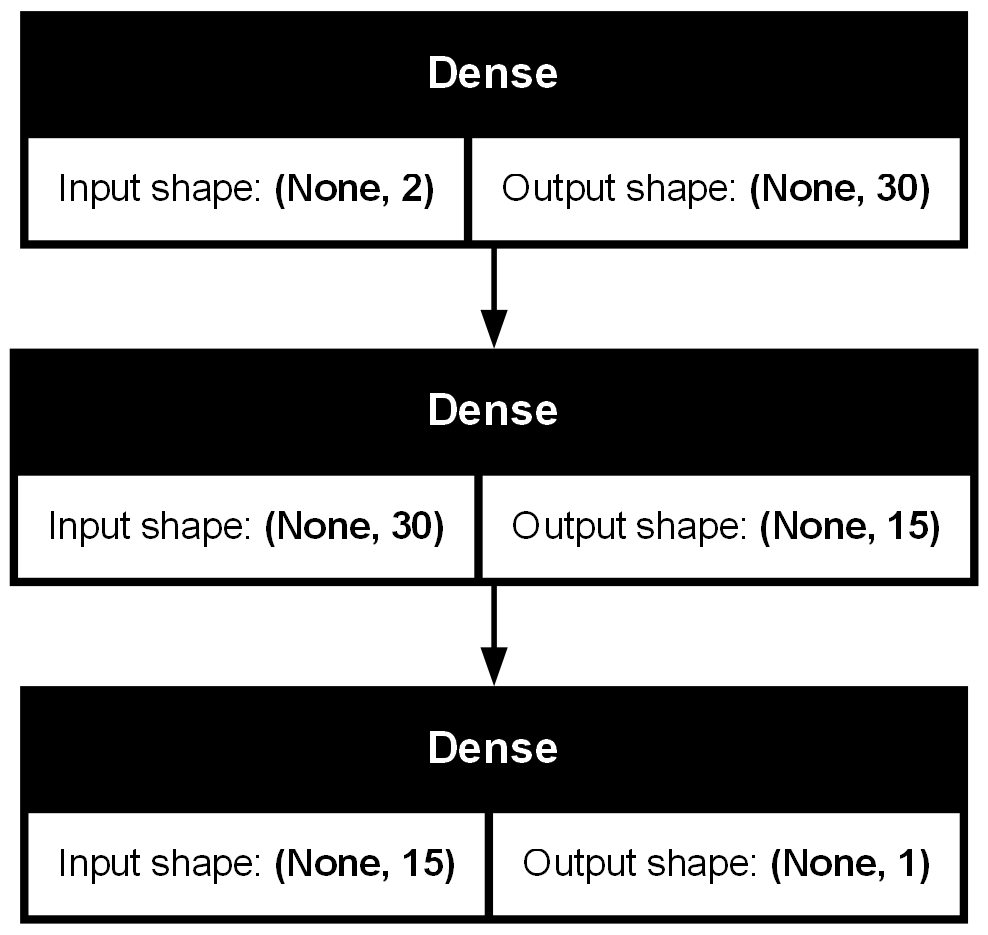

In [20]:
# Print the model summary
model.summary()
# Plot the model architecture
keras.utils.plot_model(model, show_shapes=True, to_file='model.png')

<B> Explanation of the Code </B>

In this cell, the model's architecture is summarized and visualized. Here's a breakdown of the code:

1. **Model Summary**:
    - `model.summary()` prints a detailed summary of the model, including the number of layers, the number of parameters in each layer, and the total number of trainable and non-trainable parameters.

2. **Model Visualization**:
    - `keras.utils.plot_model(model, show_shapes=True, to_file='model.png')` generates a visual representation of the model's architecture and saves it as an image file (`model.png`).
    - The `show_shapes=True` argument ensures that the shapes of the input and output tensors for each layer are displayed in the diagram.

This step provides a clear understanding of the model's structure and the flow of data through its layers, which is helpful for debugging and documentation purposes.

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<B> Explanation of the Code </B>

In this cell, the model is compiled using the `compile` method from TensorFlow's Keras API. Here's a breakdown of the code:

1. **Optimizer**:
    - The `optimizer='adam'` specifies the Adam optimizer, which is an adaptive learning rate optimization algorithm that is widely used for training deep learning models.

2. **Loss Function**:
    - The `loss='binary_crossentropy'` specifies the binary cross-entropy loss function, which is suitable for binary classification tasks. It measures the difference between the predicted probabilities and the actual binary labels.

3. **Metrics**:
    - The `metrics=['accuracy']` specifies that the model's performance will be evaluated using accuracy, which is the proportion of correctly classified samples.

Compiling the model is a crucial step before training, as it defines how the model will be optimized and evaluated during the training process.

# 5. TRAIN THE MODEL

In [22]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5697 - loss: 6.1340 - val_accuracy: 0.6404 - val_loss: 0.8183
Epoch 2/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6073 - loss: 0.7233 - val_accuracy: 0.6394 - val_loss: 0.6346
Epoch 3/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6527 - loss: 0.6125 - val_accuracy: 0.5051 - val_loss: 0.7928
Epoch 4/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6410 - loss: 0.6441 - val_accuracy: 0.6516 - val_loss: 0.6796
Epoch 5/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6857 - loss: 0.5822 - val_accuracy: 0.5400 - val_loss: 0.6889
Epoch 6/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6848 - loss: 0.5751 - val_accuracy: 0.6960 - val_loss: 0.5893
Epoch 7/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6989 - loss: 0.5684 - val_accuracy: 0.6887 - val_loss: 0.6254
Epoch 8/100
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7283 - loss: 0.5380 - val_accu

# 6. EVALUATE THE MODEL

In [23]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8248 - loss: 0.4153
Test accuracy: 0.8642578125


<b> Explanation of the Code </b>

In the previous cell, the model is evaluated on the test dataset. Here's a detailed breakdown of the code:

1. **Model Evaluation**:
    - `test_loss, test_acc = model.evaluate(X_test, y_test)` evaluates the trained model on the test dataset (`X_test` and `y_test`).
    - The method returns two values:
        - `test_loss`: The loss value (binary cross-entropy in this case) on the test dataset.
        - `test_acc`: The accuracy of the model on the test dataset.

2. **Print Test Accuracy**:
    - `print('Test accuracy:', test_acc)` displays the accuracy of the model on the test dataset. This metric indicates how well the model performs on unseen data.

This step is crucial for assessing the generalization performance of the model, ensuring that it performs well not only on the training data but also on new, unseen data.

In [24]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<b> Explanation of the Code </b>

In the previous cell, predictions are made using the trained model on the test dataset. Here's a detailed breakdown of the code:

1. **Making Predictions**:
    - `y_pred = model.predict(X_test)` generates predictions for the test dataset (`X_test`) using the trained model. The output is a probability value between 0 and 1 for each sample, indicating the likelihood of belonging to the positive class (class 1).

2. **Converting Probabilities to Binary Predictions**:
    - `y_pred = (y_pred > 0.5).astype(int)` converts the predicted probabilities into binary class labels (0 or 1). If the probability is greater than 0.5, the prediction is classified as 1; otherwise, it is classified as 0.

This step is crucial for evaluating the model's performance on the test dataset and for generating predictions that can be compared with the actual labels (`y_test`). The binary predictions are used in subsequent cells to calculate metrics such as accuracy and classification reports.

In [25]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      4096
           1       0.82      0.93      0.87      4096

    accuracy                           0.86      8192
   macro avg       0.87      0.86      0.86      8192
weighted avg       0.87      0.86      0.86      8192



<b> Explanation of the Code </b>

In the previous cell, a classification report is generated to evaluate the performance of the trained model. Here's a detailed breakdown of the code:

1. **Classification Report**:
    - `classification_report(y_test, y_pred)` generates a detailed report that includes the following metrics for each class:
        - **Precision**: The proportion of true positive predictions out of all positive predictions made by the model.
        - **Recall**: The proportion of true positive predictions out of all actual positive samples.
        - **F1-Score**: The harmonic mean of precision and recall, providing a single metric that balances both.
        - **Support**: The number of actual occurrences of each class in the test dataset.

2. **Purpose**:
    - The classification report provides a comprehensive evaluation of the model's performance for each class, helping to identify any imbalances or areas for improvement.

This step is crucial for understanding how well the model performs on the test dataset, not just in terms of overall accuracy but also in terms of precision, recall, and F1-score for each class. These metrics are particularly important for imbalanced datasets where accuracy alone may not provide a complete picture of the model's performance.

In [26]:
# Print accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.8642578125


<b> Explanation of the Code </b>

In the previous cell, the accuracy of the model on the test dataset is calculated and printed. Here's a detailed breakdown of the code:

1. **Accuracy Score**:
    - `accuracy_score(y_test, y_pred)` computes the accuracy of the model's predictions (`y_pred`) compared to the actual labels (`y_test`).
    - Accuracy is calculated as the ratio of correctly predicted samples to the total number of samples.

2. **Purpose**:
    - Printing the accuracy provides a quick and straightforward metric to evaluate the overall performance of the model on the test dataset.

3. **Significance**:
    - While accuracy is a useful metric, it may not always provide a complete picture of the model's performance, especially for imbalanced datasets. In such cases, additional metrics like precision, recall, and F1-score (as shown in previous cells) are necessary for a more comprehensive evaluation.

This step is crucial for understanding how well the model generalizes to unseen data and provides a baseline for comparing the performance of different models or configurations.

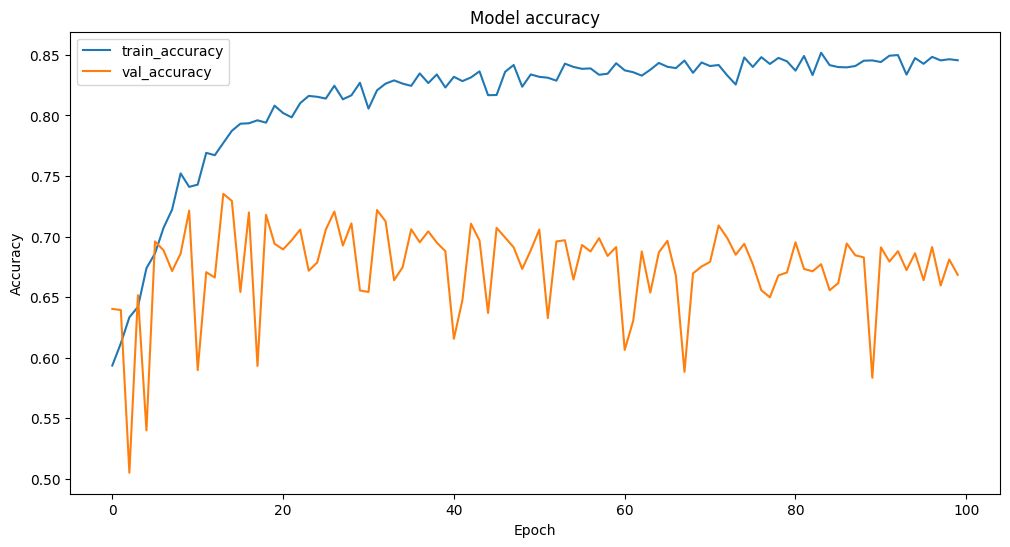

In [27]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

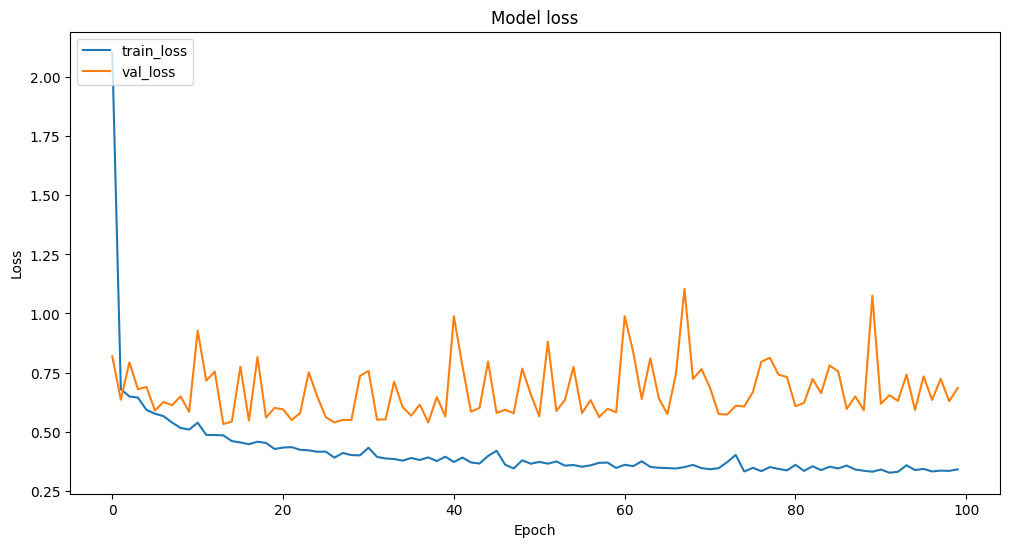

In [28]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))     
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

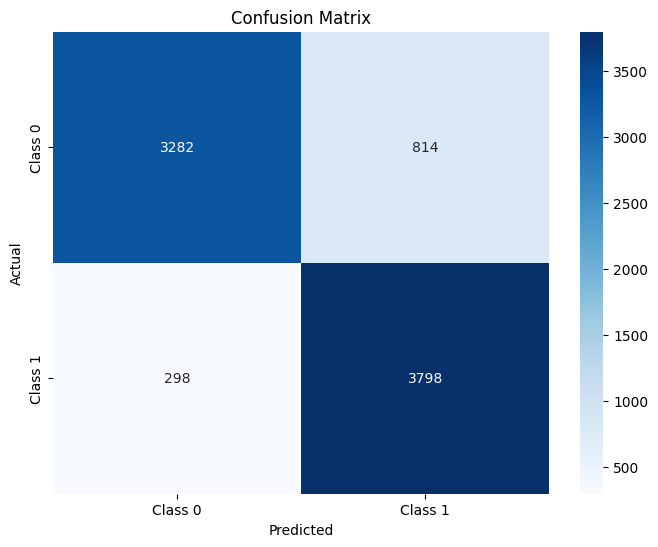

In [29]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<b> Explanation of the Code </b>

In the previous cell, a confusion matrix is generated and visualized to evaluate the performance of the trained model. Here's a detailed breakdown of the code:

1. **Confusion Matrix**:
    - `confusion_matrix(y_test, y_pred)` computes the confusion matrix for the test dataset (`y_test`) and the predicted labels (`y_pred`).
    - The confusion matrix is a table that summarizes the performance of a classification model by showing the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

2. **Visualization**:
    - The confusion matrix is visualized using a heatmap from the `seaborn` library.
    - `sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])` creates a heatmap with the following features:
        - `annot=True`: Annotates each cell with the corresponding count.
        - `fmt='d'`: Formats the annotations as integers.
        - `cmap='Blues'`: Uses a blue color map for the heatmap.
        - `xticklabels` and `yticklabels`: Labels the axes with the class names ('Class 0' and 'Class 1').

3. **Labels and Title**:
    - `plt.xlabel('Predicted')` and `plt.ylabel('Actual')` label the x-axis and y-axis, respectively.
    - `plt.title('Confusion Matrix')` adds a title to the plot.

4. **Purpose**:
    - The confusion matrix provides a detailed view of the model's performance, showing how many samples were correctly or incorrectly classified for each class.
    - It is particularly useful for identifying imbalances or specific areas where the model may be underperforming.

This step is crucial for understanding the classification performance of the model beyond simple accuracy metrics, as it provides insights into the types of errors the model is making.

# 8. SAVE AND CONVERT THE MODEL

In [30]:
# Save the model as a Keras file
model.save('model.keras')

<b> Explanation of the Code </b>

In the previous cell, the trained Keras model is saved to a file for future use. Here's a detailed breakdown of the code:

1. **Saving the Model**:
    - `model.save('model.keras')` saves the trained Keras model to a file named `model.keras`. This file contains the entire model, including:
        - The architecture of the model (layers, activation functions, etc.).
        - The trained weights of the model.
        - The optimizer configuration.
        - The training configuration (loss function, metrics, etc.).

2. **Purpose**:
    - Saving the model allows you to reuse it later without retraining. This is particularly useful for deploying the model to production or sharing it with others.

3. **File Format**:
    - The `.keras` format is a standard format for saving Keras models. It is compatible with TensorFlow and can be loaded back into a Keras environment for inference or further training.

This step is crucial for preserving the trained model and ensuring that it can be easily loaded and used in the future without the need to retrain it from scratch.

In [31]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model has been converted to TensorFlow Lite format and saved as 'model.tflite'.")

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmp8w5h0ow6\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmp8w5h0ow6\assets


Saved artifact at 'C:\Users\USER\AppData\Local\Temp\tmp8w5h0ow6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 2), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2233364371920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2233364373264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2233364375568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2233364376528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2233364375760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2233364374608: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model has been converted to TensorFlow Lite format and saved as 'model.tflite'.


<b> Explanation of the Code </b>

In the previous cell, the trained Keras model is converted to TensorFlow Lite format and saved to a file. Here's a detailed breakdown of the code:

1. **Convert the Model to TensorFlow Lite Format**:
    - `tf.lite.TFLiteConverter.from_keras_model(model)` initializes a TensorFlow Lite converter for the trained Keras model.
    - `converter.convert()` converts the Keras model into TensorFlow Lite format, which is optimized for deployment on mobile and embedded devices.

2. **Save the TensorFlow Lite Model**:
    - `with open('model.tflite', 'wb') as f: f.write(tflite_model)` saves the converted TensorFlow Lite model to a file named `model.tflite`. The model is written in binary format.

3. **Purpose**:
    - TensorFlow Lite models are lightweight and optimized for inference on resource-constrained devices, such as smartphones, IoT devices, and microcontrollers.

4. **Output Message**:
    - `print("Model has been converted to TensorFlow Lite format and saved as 'model.tflite'.")` confirms that the model has been successfully converted and saved.

This step is crucial for deploying the trained model to environments where computational resources are limited, enabling efficient inference on edge devices.

# 10. EVALUATE THE SAVED MODEL

In [32]:
# Get the size of the Keras model
keras_model_size = os.path.getsize('model.keras') / 1024  # Size in KB
print(f"Size of Keras model: {keras_model_size:.2f} KB")

# Get the size of the TensorFlow Lite model
tflite_model_size = os.path.getsize('model.tflite') / 1024  # Size in KB
print(f"Size of TensorFlow Lite model: {tflite_model_size:.2f} KB")

Size of Keras model: 31.49 KB
Size of TensorFlow Lite model: 4.23 KB


In [33]:
# Evaluate the accuracy of the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preprocess the test data for TensorFlow Lite model
X_test_tflite = X_test.astype(np.float32)

# Make predictions with the TensorFlow Lite model
y_pred_tflite = []
for i in range(len(X_test_tflite)):
    interpreter.set_tensor(input_details[0]['index'], [X_test_tflite[i]])
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])
    y_pred_tflite.append(output[0])

# Convert probabilities to binary predictions
y_pred_tflite = (np.array(y_pred_tflite) > 0.5).astype(int)

# Print accuracy of the TensorFlow Lite model
tflite_accuracy = accuracy_score(y_test, y_pred_tflite)
print(f"Accuracy of TensorFlow Lite model: {tflite_accuracy:.4f}")

# Print accuracy of the Keras model (already computed)
print(f"Accuracy of Keras model: {test_acc:.4f}")

Accuracy of TensorFlow Lite model: 0.8643
Accuracy of Keras model: 0.8643


<b> Explanation of the Code </b>

In the previous cell, the TensorFlow Lite model is evaluated for accuracy and compared with the Keras model. Here's a detailed breakdown of the code:

1. **Load the TensorFlow Lite Model**:
    - `interpreter = tf.lite.Interpreter(model_path='model.tflite')` loads the TensorFlow Lite model from the file `model.tflite`.
    - `interpreter.allocate_tensors()` allocates memory for the model's input and output tensors.

2. **Retrieve Input and Output Details**:
    - `input_details = interpreter.get_input_details()` retrieves details about the model's input tensor, such as its shape and data type.
    - `output_details = interpreter.get_output_details()` retrieves details about the model's output tensor.

3. **Preprocess the Test Data**:
    - `X_test_tflite = X_test.astype(np.float32)` converts the test data to the `float32` data type, which is required by TensorFlow Lite models.

4. **Make Predictions with the TensorFlow Lite Model**:
    - A loop iterates over each sample in the test dataset (`X_test_tflite`).
    - `interpreter.set_tensor(input_details[0]['index'], [X_test_tflite[i]])` sets the input tensor for the current sample.
    - `interpreter.invoke()` runs inference on the current sample.
    - `output = interpreter.get_tensor(output_details[0]['index'])` retrieves the model's output (predicted probability) for the current sample.
    - The predicted probabilities are appended to the `y_pred_tflite` list.

5. **Convert Probabilities to Binary Predictions**:
    - `y_pred_tflite = (np.array(y_pred_tflite) > 0.5).astype(int)` converts the predicted probabilities into binary class labels (0 or 1). If the probability is greater than 0.5, the prediction is classified as 1; otherwise, it is classified as 0.

6. **Evaluate the TensorFlow Lite Model**:
    - `tflite_accuracy = accuracy_score(y_test, y_pred_tflite)` calculates the accuracy of the TensorFlow Lite model's predictions compared to the actual labels (`y_test`).
    - `print(f"Accuracy of TensorFlow Lite model: {tflite_accuracy:.4f}")` displays the accuracy of the TensorFlow Lite model.

7. **Compare with Keras Model Accuracy**:
    - `print(f"Accuracy of Keras model: {test_acc:.4f}")` displays the accuracy of the Keras model, which was previously computed.

This step is crucial for verifying that the TensorFlow Lite model performs similarly to the original Keras model, ensuring that the conversion process did not degrade the model's accuracy. It also demonstrates how to use the TensorFlow Lite interpreter for inference on test data.

In [ ]:
xxd -i model.tflite > model.cc        # konvert program to .cc source file
xxd -i model.tflite > model.h        # konvert program to .h header file
# run it on git bash terminal of visual studio code below

In [ ]:






# # Save the model    
# model.save('model.h5')
# # Load the model    
# loaded_model = keras.models.load_model('model.h5')
# # Make predictions with the loaded model    
# loaded_y_pred = loaded_model.predict(X_test)
# loaded_y_pred = (loaded_y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
# # Print classification report for loaded model
# print(classification_report(y_test, loaded_y_pred))
# # Print accuracy score for loaded model
# print('Accuracy of loaded model:', accuracy_score(y_test, loaded_y_pred))
# # Save the model architecture as JSON
# model_json = model.to_json()    
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # Save the model weights
# model.save_weights("model.h5")
# # Load the model architecture from JSON
# with open('model.json', 'r') as json_file:
#     loaded_model_json = json_file.read()
# # Create a new model from the loaded architecture
# loaded_model = keras.models.model_from_json(loaded_model_json)
# # Load the weights into the new model   
# loaded_model.load_weights("model.h5")
# # Compile the loaded model
# loaded_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# # Make predictions with the loaded model    
# loaded_y_pred = loaded_model.predict(X_test)
# loaded_y_pred = (loaded_y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
# # Print classification report for loaded model
# print(classification_report(y_test, loaded_y_pred))
# # Print accuracy score for loaded model
# print('Accuracy of loaded model:', accuracy_score(y_test, loaded_y_pred))
# # Save the model as a TensorFlow SavedModel
# model.save('saved_model/my_model')
# # Load the model from the SavedModel format
# loaded_model = keras.models.load_model('saved_model/my_model')
# # Make predictions with the loaded model
# loaded_y_pred = loaded_model.predict(X_test)
# loaded_y_pred = (loaded_y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions